# **Lecture 11 Linear Regression Example**

In [165]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [166]:
# Generate N data points
N = 50

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

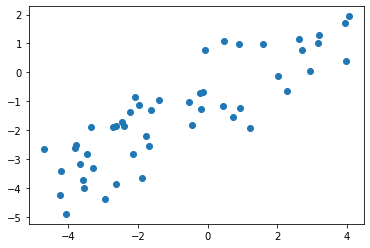

In [167]:
plt.scatter(X,Y)

In [168]:
model = nn.Linear(1,1)

In [169]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [170]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [171]:
# Train the model
n_epochs = int(round(N*1.25,0))
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/62, Loss: 2.8690
Epoch 2/62, Loss: 2.3789
Epoch 3/62, Loss: 2.1019
Epoch 4/62, Loss: 1.8815
Epoch 5/62, Loss: 1.6991
Epoch 6/62, Loss: 1.5475
Epoch 7/62, Loss: 1.4216
Epoch 8/62, Loss: 1.3169
Epoch 9/62, Loss: 1.2299
Epoch 10/62, Loss: 1.1576
Epoch 11/62, Loss: 1.0975
Epoch 12/62, Loss: 1.0476
Epoch 13/62, Loss: 1.0061
Epoch 14/62, Loss: 0.9716
Epoch 15/62, Loss: 0.9429
Epoch 16/62, Loss: 0.9191
Epoch 17/62, Loss: 0.8993
Epoch 18/62, Loss: 0.8828
Epoch 19/62, Loss: 0.8692
Epoch 20/62, Loss: 0.8578
Epoch 21/62, Loss: 0.8483
Epoch 22/62, Loss: 0.8405
Epoch 23/62, Loss: 0.8340
Epoch 24/62, Loss: 0.8285
Epoch 25/62, Loss: 0.8240
Epoch 26/62, Loss: 0.8203
Epoch 27/62, Loss: 0.8172
Epoch 28/62, Loss: 0.8146
Epoch 29/62, Loss: 0.8125
Epoch 30/62, Loss: 0.8107
Epoch 31/62, Loss: 0.8092
Epoch 32/62, Loss: 0.8079
Epoch 33/62, Loss: 0.8069
Epoch 34/62, Loss: 0.8061
Epoch 35/62, Loss: 0.8054
Epoch 36/62, Loss: 0.8048
Epoch 37/62, Loss: 0.8043
Epoch 38/62, Loss: 0.8039
Epoch 39/62, Loss: 0.

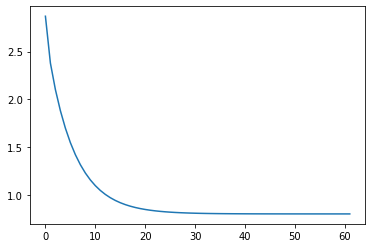

In [172]:
# Plot the loss per iteration
plt.plot(losses);

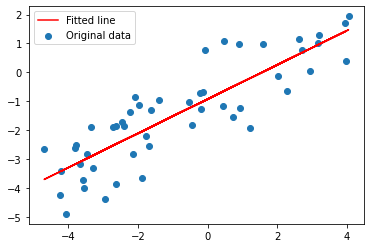

In [173]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line', color = 'red')
plt.legend()
plt.show()

In [174]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.5923111]] [-0.92756486]


# **Lecture 13 Moores Law**

In [175]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [176]:
# Get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [177]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1].reshape(-1, 1)

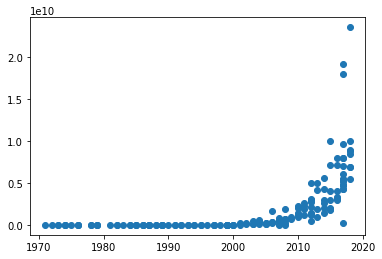

In [178]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

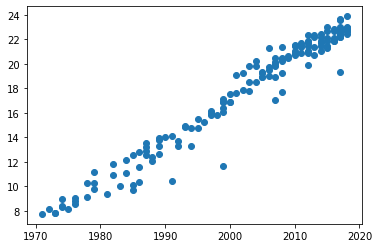

In [179]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y);
# that's better

In [180]:
# Scale and center both the x and y axes
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy

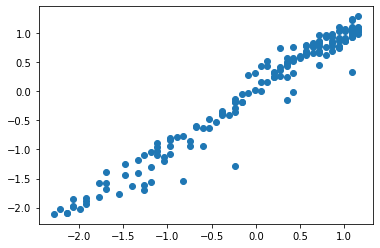

In [181]:
# Everything is centered and in a small range
plt.scatter(X, Y);

In [182]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [183]:
# Create the linear regression model
model = nn.Linear(1, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [184]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [185]:
# Train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 0.9361
Epoch 2/100, Loss: 0.9005
Epoch 3/100, Loss: 0.8424
Epoch 4/100, Loss: 0.7719
Epoch 5/100, Loss: 0.6964
Epoch 6/100, Loss: 0.6210
Epoch 7/100, Loss: 0.5489
Epoch 8/100, Loss: 0.4820
Epoch 9/100, Loss: 0.4213
Epoch 10/100, Loss: 0.3671
Epoch 11/100, Loss: 0.3194
Epoch 12/100, Loss: 0.2777
Epoch 13/100, Loss: 0.2416
Epoch 14/100, Loss: 0.2105
Epoch 15/100, Loss: 0.1839
Epoch 16/100, Loss: 0.1612
Epoch 17/100, Loss: 0.1419
Epoch 18/100, Loss: 0.1256
Epoch 19/100, Loss: 0.1117
Epoch 20/100, Loss: 0.1000
Epoch 21/100, Loss: 0.0902
Epoch 22/100, Loss: 0.0818
Epoch 23/100, Loss: 0.0749
Epoch 24/100, Loss: 0.0690
Epoch 25/100, Loss: 0.0641
Epoch 26/100, Loss: 0.0599
Epoch 27/100, Loss: 0.0564
Epoch 28/100, Loss: 0.0535
Epoch 29/100, Loss: 0.0511
Epoch 30/100, Loss: 0.0490
Epoch 31/100, Loss: 0.0473
Epoch 32/100, Loss: 0.0459
Epoch 33/100, Loss: 0.0447
Epoch 34/100, Loss: 0.0437
Epoch 35/100, Loss: 0.0428
Epoch 36/100, Loss: 0.0421
Epoch 37/100, Loss: 0.0415
Epoch 38/1

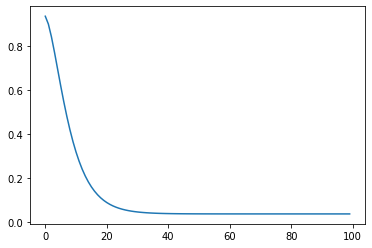

In [186]:
# Loss per iteration
plt.plot(losses);

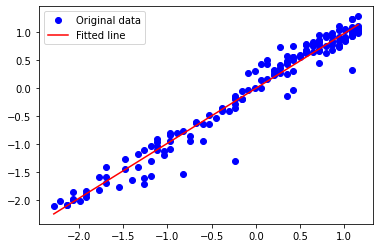

In [187]:
# Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data', color = 'blue')
plt.plot(X, predicted, label='Fitted line', color = 'red')
plt.legend()
plt.show()

In [188]:
# What does this mean?
w = model.weight.data.numpy()
print(w)

[[0.9804392]]


# Transforming back to original scale

Our original hypothesis is that the growth is exponential. This has the form:

$$ C = C_0 r ^ t $$

In this equation, $C$ is the transistor count, $t$ is the year, $C_0$ is the original transistor count at year $0$, and $r$ is the rate of growth.

We made this equation linear by taking the log of both sides.

$$ \log C = \log C_0 + \log r * t $$

Here, $\log C$ represents the variable that goes along the y-axis, and $t$ represents the variable that goes along the x-axis.

In other words, under our hypothesized model, the log of transistor counts is linear with respect to time.

Let us rename the variables to a more familiar form:

$$ y = a x + \log C_0 $$

Now $y=\log C$ represents the log of transistor counts and $x=t$ represents time. $a = \log r$ is the slope and $\log C_0$ is the y-intercept.

# Our Model

We normalized the data as follows:

$$ y' = \frac{y - m_y}{s_y} $$

$$ x' = \frac{x - m_x}{s_x} $$

Here, $m_x$ represents the sample mean of the $x$ data and $s_x$ represens the sample standard deviation of the $x$ data, with analogous definitions for $m_y$ and $s_y$.

Our model looks like:

$$ y' = wx' + b $$

We can recover the original model by substituting $x'$ and $y'$ with corresponding expressions in terms of $x$ and $y$.

$$ \frac{y - m_y}{s_y} = w \frac{x - m_x}{s_x} + b $$

After some algebraic manipulation (try it yourself, it's only high school math), we get:

$$ y = w \frac{s_y}{s_x} x - w \frac{s_y}{s_x} m_x + b s_y + m_y = a x + \log C_0 $$

It is clear that the coefficient in front of $x$ represents our original $a$, and the sum of all the other terms represents $\log C_0$.

We are only interested in the doubling time, so we have found that:

$$ a = w \frac{s_y}{s_x} $$

In [189]:
a = w[0,0] * sy / sx
print(a)

0.34163651361115693


# Exponential Growth Model

Our equation is currently linear. We still need to find the doubling time.

Our original model for exponential growth is:

$$ C = C_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log C_0 $$

This is our linear equation:

$$ y = ax + \log C_0 $$

Where:

$$ y = \log C $$
$$ a = \log r $$
$$ x = t $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.341659983 $$

so that:

$$ r = e^{0.341659983} = 1.40728 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = C_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = C_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (C_0 r ^ {t'}) / C_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [190]:
print("Time to double:", np.log(2) / a)

Time to double: 2.028902511717088


# Exercise

What happens when you *don't* normalize the data?

This makes it easier because you no longer need to do the transformation step.

But what happens to the optimization? Can you use the same learning rate as we did originally? NO: 

Epoch 1/5, Loss: 599014.6250
Epoch 2/5, Loss: 3850692120805376.0000
Epoch 3/5, Loss: 24754156264484726907076608.0000
Epoch 4/5, Loss: 159132230386458178534140623305310208.0000
Epoch 5/5, Loss: inf


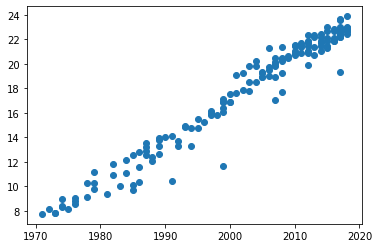

In [191]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1].reshape(-1, 1)

# To Linear
Y = np.log(Y)
plt.scatter(X, Y);

# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

# Create the linear regression model
model = nn.Linear(1, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)



# Train the model
n_epochs = 5
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
 
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')



Epoch 1/10, Loss: 2346792.7500
Epoch 2/10, Loss: 150868494046772330496.0000
Epoch 3/10, Loss: 9698994050692508097075534983331840.0000
Epoch 4/10, Loss: inf
Epoch 5/10, Loss: inf
Epoch 6/10, Loss: inf
Epoch 7/10, Loss: inf
Epoch 8/10, Loss: nan
Epoch 9/10, Loss: nan
Epoch 10/10, Loss: nan


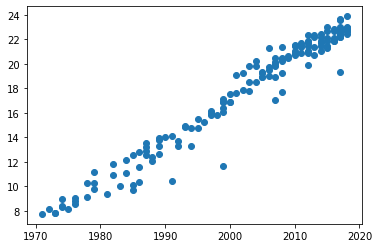

In [192]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1].reshape(-1, 1)

# To Linear
Y = np.log(Y)
plt.scatter(X, Y);

# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

# Create the linear regression model
model = nn.Linear(1, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1, momentum=4)

inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

# Train the model
n_epochs = 10
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
 
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')



# **Classification NoteBook**

In [193]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [194]:
# Load in the data
from sklearn.datasets import load_breast_cancer

# load the data
data = load_breast_cancer()

# check the type of 'data'
type(data)

sklearn.utils.Bunch

In [195]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [196]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [197]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [198]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [199]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [200]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [201]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split


# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [202]:
# Scale the data
# you'll learn why scaling is needed in a later course
# Scaling. This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. 
#You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN.
# So all the different variances of inputs are the same so the distances between points are the same
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
# Now all the fun PyTorch stuff
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [204]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [205]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [206]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.6410, Test Loss: 0.6517
Epoch 100/1000, Train Loss: 0.4636, Test Loss: 0.4676
Epoch 150/1000, Train Loss: 0.3657, Test Loss: 0.3688
Epoch 200/1000, Train Loss: 0.3054, Test Loss: 0.3061
Epoch 250/1000, Train Loss: 0.2642, Test Loss: 0.2622
Epoch 300/1000, Train Loss: 0.2340, Test Loss: 0.2296
Epoch 350/1000, Train Loss: 0.2110, Test Loss: 0.2046
Epoch 400/1000, Train Loss: 0.1928, Test Loss: 0.1851
Epoch 450/1000, Train Loss: 0.1782, Test Loss: 0.1696
Epoch 500/1000, Train Loss: 0.1662, Test Loss: 0.1572
Epoch 550/1000, Train Loss: 0.1561, Test Loss: 0.1471
Epoch 600/1000, Train Loss: 0.1476, Test Loss: 0.1387
Epoch 650/1000, Train Loss: 0.1404, Test Loss: 0.1317
Epoch 700/1000, Train Loss: 0.1341, Test Loss: 0.1258
Epoch 750/1000, Train Loss: 0.1286, Test Loss: 0.1207
Epoch 800/1000, Train Loss: 0.1237, Test Loss: 0.1163
Epoch 850/1000, Train Loss: 0.1194, Test Loss: 0.1124
Epoch 900/1000, Train Loss: 0.1156, Test Loss: 0.1089
Epoch 950/1000, Train Loss: 0

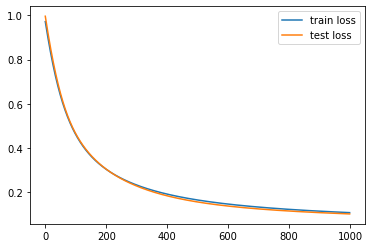

In [207]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [208]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9816, Test acc: 0.9681


# Exercise: Plot the accuracy per iteration

In [217]:
# You rerun all of this to reset the model or you overwrite the model variable
# If you don't its like running 2000 epochs 

# Load in the data
from sklearn.datasets import load_breast_cancer

# load the data
data = load_breast_cancer()

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [218]:
# Exercise: Plot the accuracy per iteration too

# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_acc = np.zeros(n_epochs)
test_acc = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  # Save Accuracy
  with torch.no_grad():
    outputs_np = np.round(outputs.numpy())
    train_acc_val = np.mean(y_train.numpy() == outputs_np)
    train_acc[it] = train_acc_val

    outputs_test_np = np.round(outputs_test.numpy())
    test_acc_val = np.mean(y_test.numpy() == outputs_test_np)
    test_acc[it] = test_acc_val
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}, Train Acc: {train_acc_val:.4f}, Test Acc: {test_acc_val:.4f}')


Epoch 50/1000, Train Loss: 0.4494, Test Loss: 0.4563, Train Acc: 0.9029, Test Acc: 0.8617
Epoch 100/1000, Train Loss: 0.3368, Test Loss: 0.3434, Train Acc: 0.9344, Test Acc: 0.9043
Epoch 150/1000, Train Loss: 0.2713, Test Loss: 0.2807, Train Acc: 0.9475, Test Acc: 0.9202
Epoch 200/1000, Train Loss: 0.2293, Test Loss: 0.2414, Train Acc: 0.9554, Test Acc: 0.9362
Epoch 250/1000, Train Loss: 0.2006, Test Loss: 0.2148, Train Acc: 0.9606, Test Acc: 0.9309
Epoch 300/1000, Train Loss: 0.1799, Test Loss: 0.1956, Train Acc: 0.9685, Test Acc: 0.9309
Epoch 350/1000, Train Loss: 0.1643, Test Loss: 0.1811, Train Acc: 0.9711, Test Acc: 0.9309
Epoch 400/1000, Train Loss: 0.1521, Test Loss: 0.1698, Train Acc: 0.9711, Test Acc: 0.9415
Epoch 450/1000, Train Loss: 0.1424, Test Loss: 0.1606, Train Acc: 0.9711, Test Acc: 0.9415
Epoch 500/1000, Train Loss: 0.1343, Test Loss: 0.1531, Train Acc: 0.9711, Test Acc: 0.9415
Epoch 550/1000, Train Loss: 0.1276, Test Loss: 0.1467, Train Acc: 0.9711, Test Acc: 0.9415


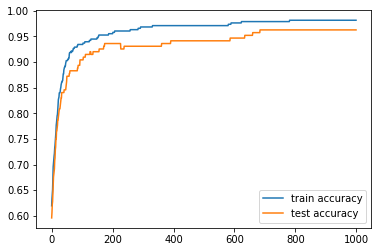

In [219]:
# Plot the train accuracy and test accuracy per iteration
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label='test accuracy')
plt.legend()
plt.show()

# Save and Load **Model**

In [211]:
# Look at the state dict <- Weights of the neural network
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5175, -0.5563, -0.5811, -0.4307, -0.2923, -0.2243, -0.2845, -0.5124,
                       -0.0610,  0.6437, -0.5169, -0.1304, -0.4499, -0.3932, -0.1549,  0.4876,
                       -0.2685, -0.3084,  0.3852,  0.6296, -0.4611, -0.6197, -0.3211, -0.5015,
                       -0.6683, -0.3510, -0.2778, -0.3141, -0.6440, -0.5094]])),
             ('0.bias', tensor([0.4457]))])

In [212]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [213]:
!ls

moore.csv  mymodel.pt  sample_data


In [214]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seeing later.
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [215]:
# Evaluate the new model
# Results should be the same!
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9869, Test acc: 0.9787


In [216]:
# Download the model
from google.colab import files
files.download('mymodel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **With LOGIT**

Two differences

In [ ]:
# Two differences

# Create Model
criterion = nn.BCEWithLogitsLoss() # Don't need the sigmoid because we have the gradient descent
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# Making Predictions check if more or less then zero.
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.numpy() > 0)
  train_acc = np.mean(y_train.numpy() == p_train) # Check means to each other.

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")